In [58]:
import numpy as np
from scipy import stats
import pickle
import torch
import datetime
from PIL import Image
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [59]:
def loadFeatureWithZ(path):
    f=open(path,'rb')
    feature=[]
    dim=102
    trainFeature=pickle.load(f)
    for i in range(len(trainFeature['face']['z'])):
        for j in  range(trainFeature['face']['z'][i].shape[0]):
            fv=np.zeros(dim+1)
            fv[:dim]= trainFeature['face']['z'][i][j]
            #fv[2048:4096]= trainFeature['face']['v'][i][j].numpy()
            fv[dim]=1
            feature.append(fv)

    for i in range(len(trainFeature['scramble']['z'])):
        for j in  range(trainFeature['scramble']['z'][i].shape[0]):
            fv=np.zeros(dim+1)
            fv[:dim]= trainFeature['scramble']['z'][i][j]
            #fv[2048:4096]= trainFeature['scramble']['v'][i][j].numpy()
            fv[dim]=0
            feature.append(fv)
    return feature

In [264]:
trainFeature=loadFeatureWithZ('./Model_output_Feature/Training_Feature_R108E80_102_AllClass_kKLDloss_withSingleZ')

trainFeature = np.array(trainFeature)

faceidx = np.where(trainFeature[:,102:103]==1)[0]
scrambleidx = np.where(trainFeature[:,102:103]==0)[0]

fmu = trainFeature[faceidx,0:102]
smu = trainFeature[scrambleidx,0:102]

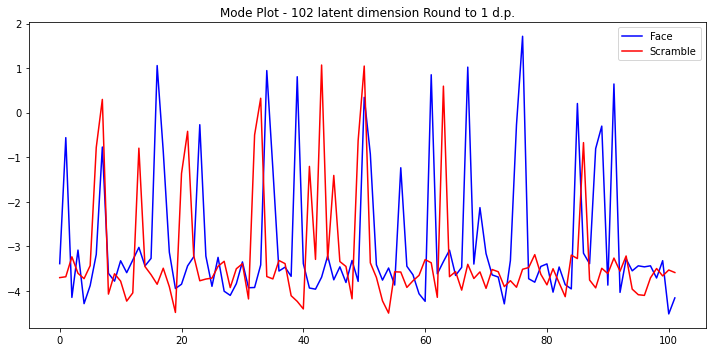

In [265]:
fmuMode = stats.mode(fmu)[0][0]
smuMode = stats.mode(smu)[0][0]
#print(fmuMode)
#print(np.max(fmu[:,0:1]))
fmuMean = np.mean(fmu,axis=0)
smuMean = np.mean(smu,axis=0)
fmuV = np.var(fmu,axis=0)
smuV = np.var(smu,axis=0)
fig,axes=plt.subplots(1,1,figsize=(10,5))
axes.set_title('Mode Plot - 102 latent dimension Round to 1 d.p.')
axes.plot(range(0,featureDim),fmuMode, '-',color="blue")
axes.plot(range(0,featureDim),smuMode, '-',color="red")
axes.legend(['Face','Scramble'])
#axes[1].set_title('Mean Plot - 102 latent dimension')
#axes[1].plot(range(0,featureDim),fmuMean, '-',color="blue")
#axes[1].plot(range(0,featureDim),smuMean, '-',color="red")
#axes[1].legend(['Face','Scramble'])
#axes[2].set_title('Variance Plot - 102 latent dimension')
#axes[2].plot(range(0,featureDim),fmuV, '-',color="blue")
#axes[2].plot(range(0,featureDim),smuV, '-',color="red")
#axes[2].legend(['Face','Scramble'])
fig.tight_layout()
plt.savefig('./102latentDistribution_roundto1.png')

(4700, 1)


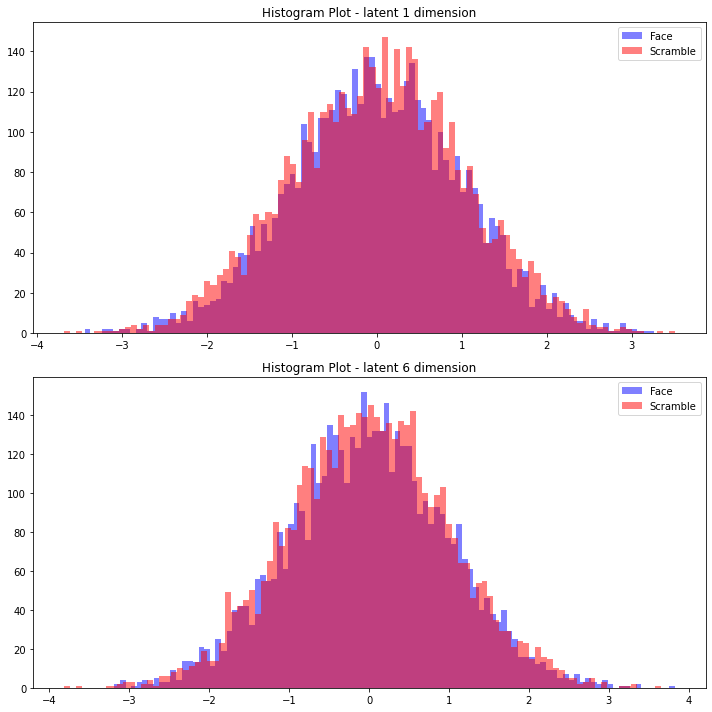

In [233]:
sensoridx = [1,6]
faceS1 = fmu[:,21:22]
faceS2 = fmu[:,sensoridx[1]:sensoridx[1]+1,]
sS1 = smu[:,sensoridx[0]:sensoridx[0]+1]
sS2 = smu[:,sensoridx[1]:sensoridx[1]+1]
print(faceS1.shape)
bins=100
fig,axes=plt.subplots(2,1,figsize=(10,10))
axes[0].set_title('Histogram Plot - latent '+str(sensoridx[0])+' dimension')
axes[0].hist(faceS1,color="blue",alpha=0.5,bins=bins)
axes[0].hist(sS1,color="red",alpha=0.5,bins=bins)
axes[0].legend(['Face','Scramble'])
axes[1].set_title('Histogram Plot - latent '+str(sensoridx[1])+' dimension')
axes[1].hist(faceS2,color="blue",alpha=0.5,bins=bins)
axes[1].hist(sS2,color="red",alpha=0.5,bins=bins)
axes[1].legend(['Face','Scramble'])

fig.tight_layout()
plt.savefig('./RandomSensor_Histogram.png')

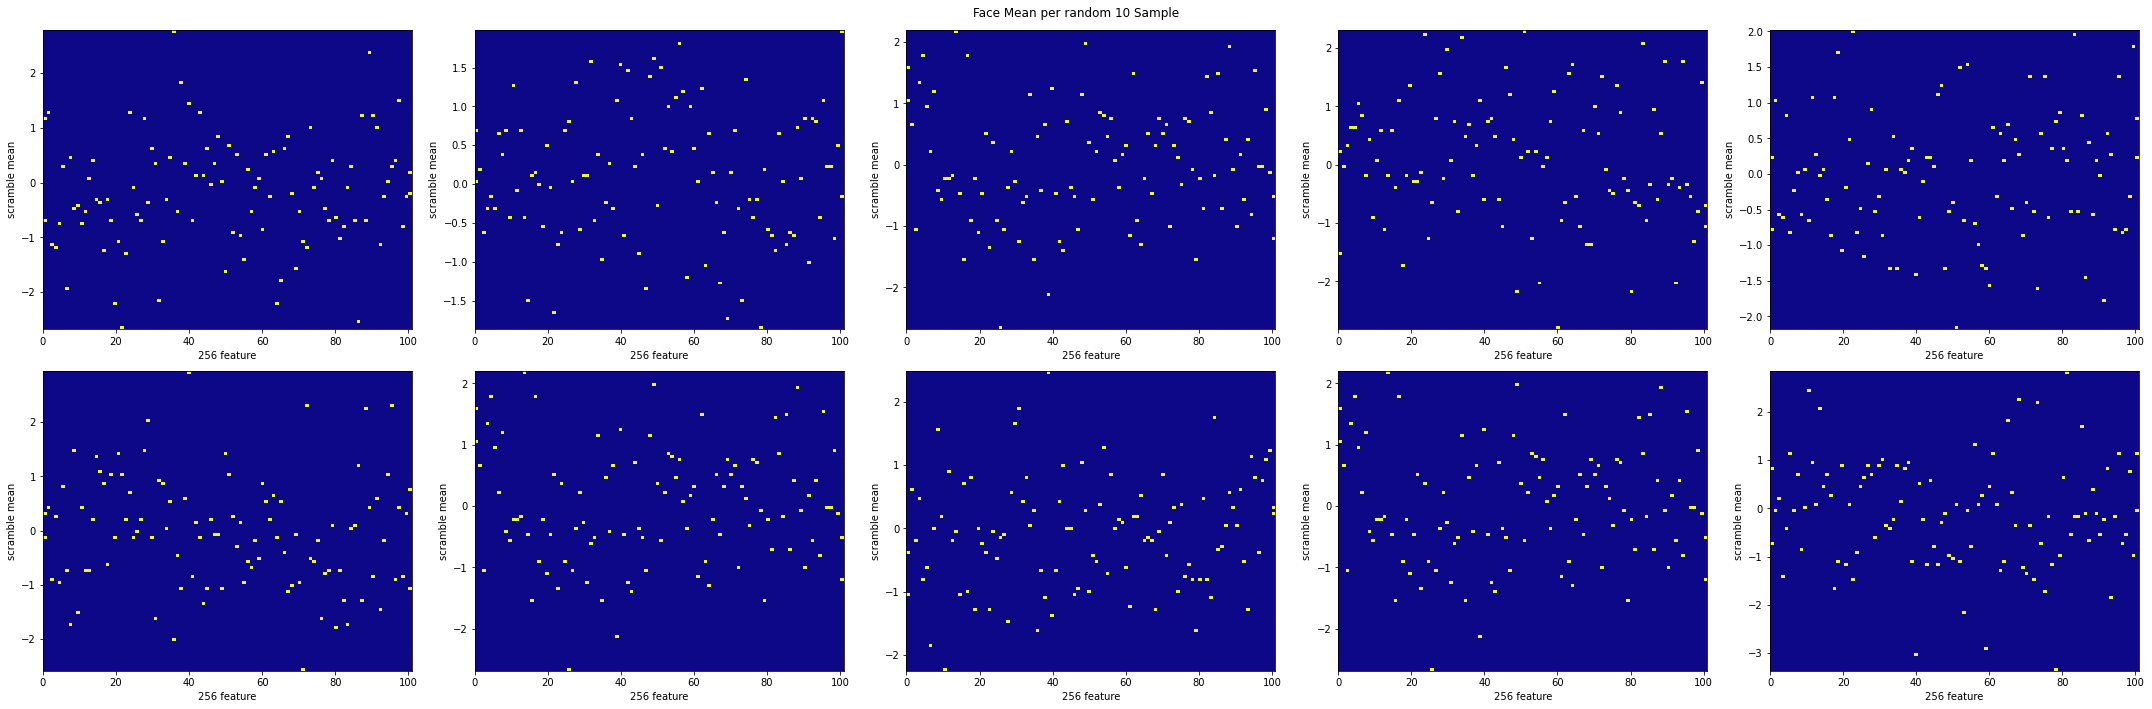

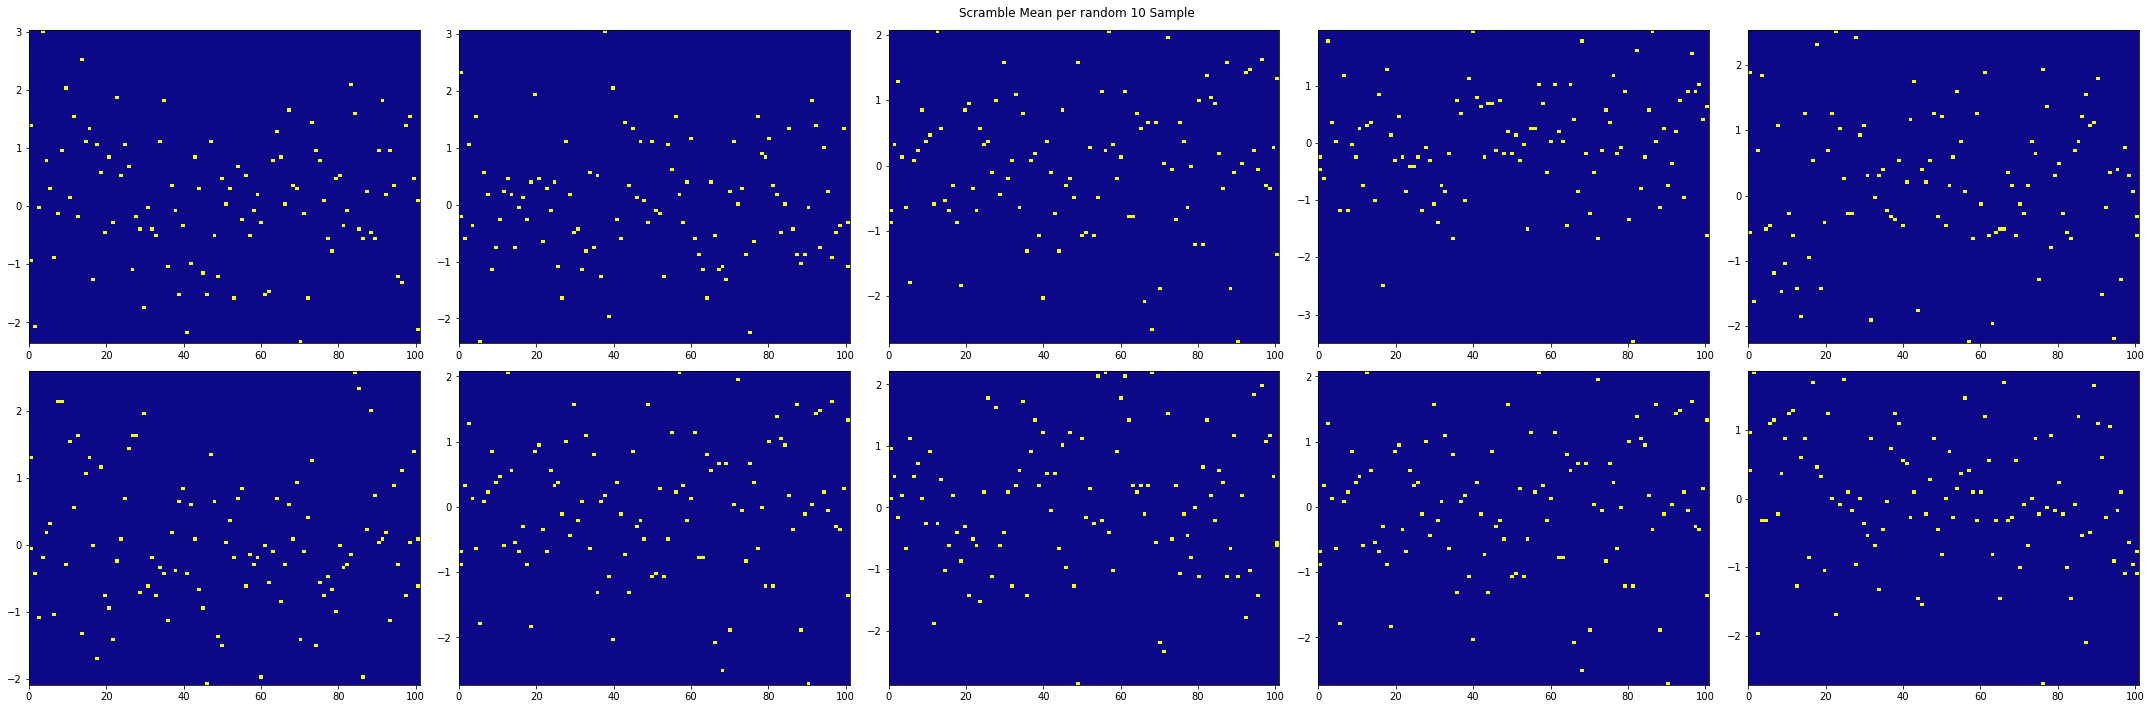

In [84]:
figm,axes=plt.subplots(2,5,figsize=(30,10))
figs,axess=plt.subplots(2,5,figsize=(30,10))
idx = np.random.choice(10,fmu.shape[0])
figm.suptitle('Face Mean per random 10 Sample')
figs.suptitle('Scramble Mean per random 10 Sample')
axess = axess.flatten()
for i,ax in enumerate(axes.flat):
    x=range(0,featureDim)
    ax.hist2d(x,fmu[idx[i]], bins=100,density=True,cmap="plasma")
    ax.set_xlabel('256 feature')
    ax.set_ylabel('face mean ')
    axess[i].hist2d(x,smu[idx[i]], bins=100,density=True,cmap="plasma")
    ax.set_xlabel('256 feature')
    ax.set_ylabel('scramble mean')
    
    #ax.scatter(range(0,2048),smu[idx[i]])
figm.tight_layout()
figs.tight_layout()
#for i in range(3,4): 
#    ax[1].scatter(range(0,2048),smu[i])

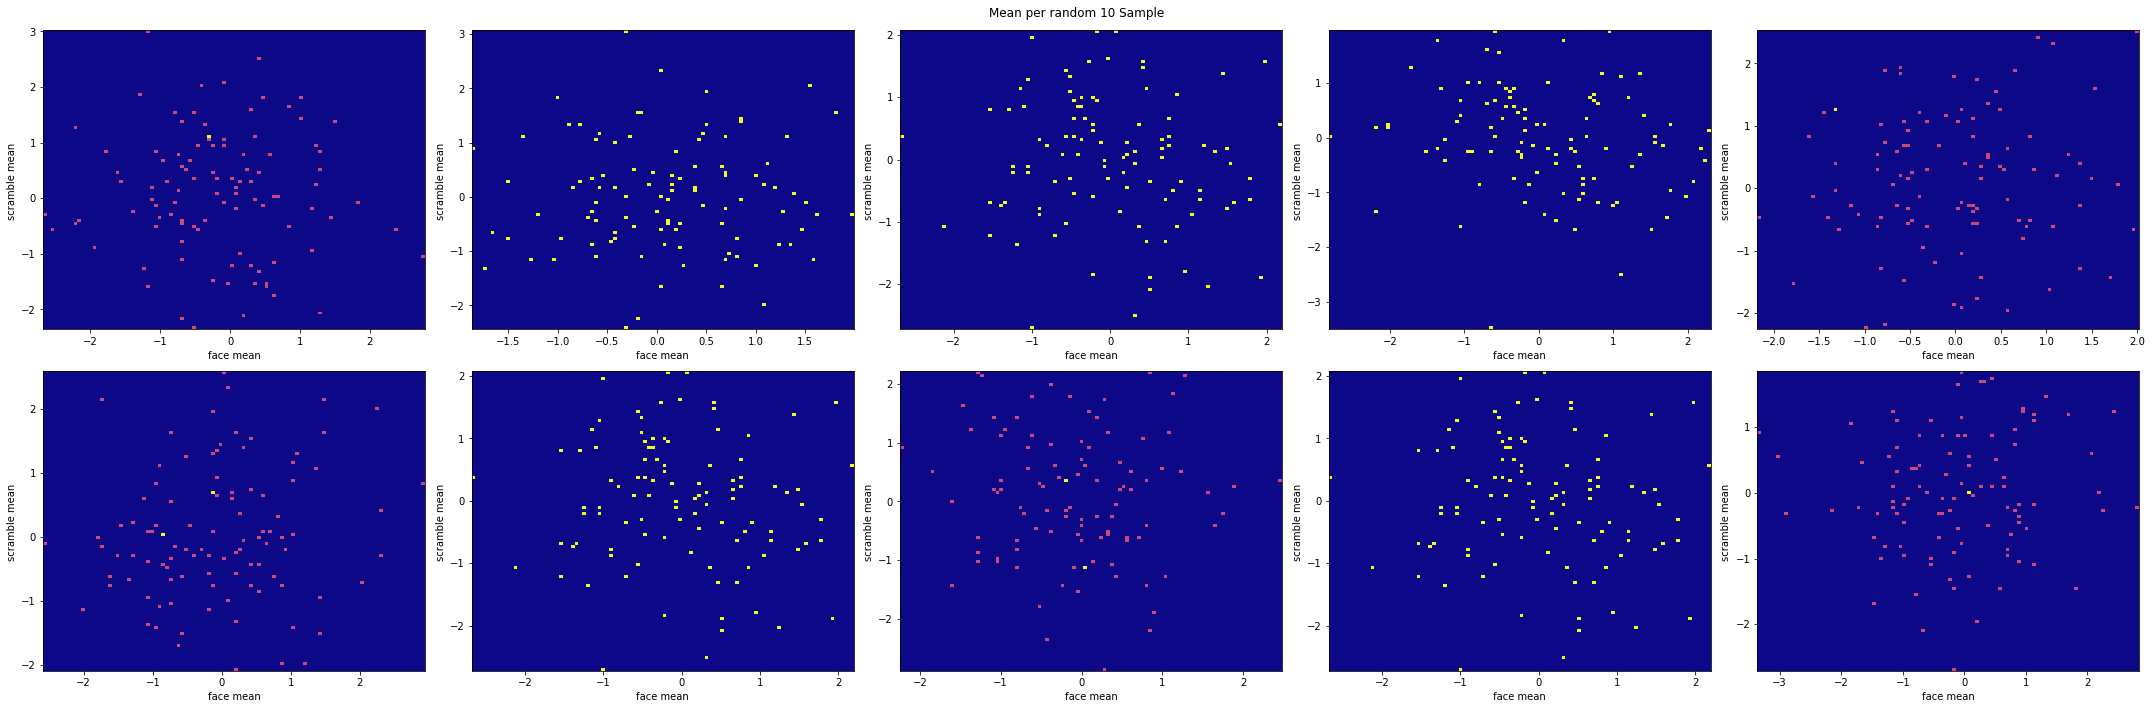

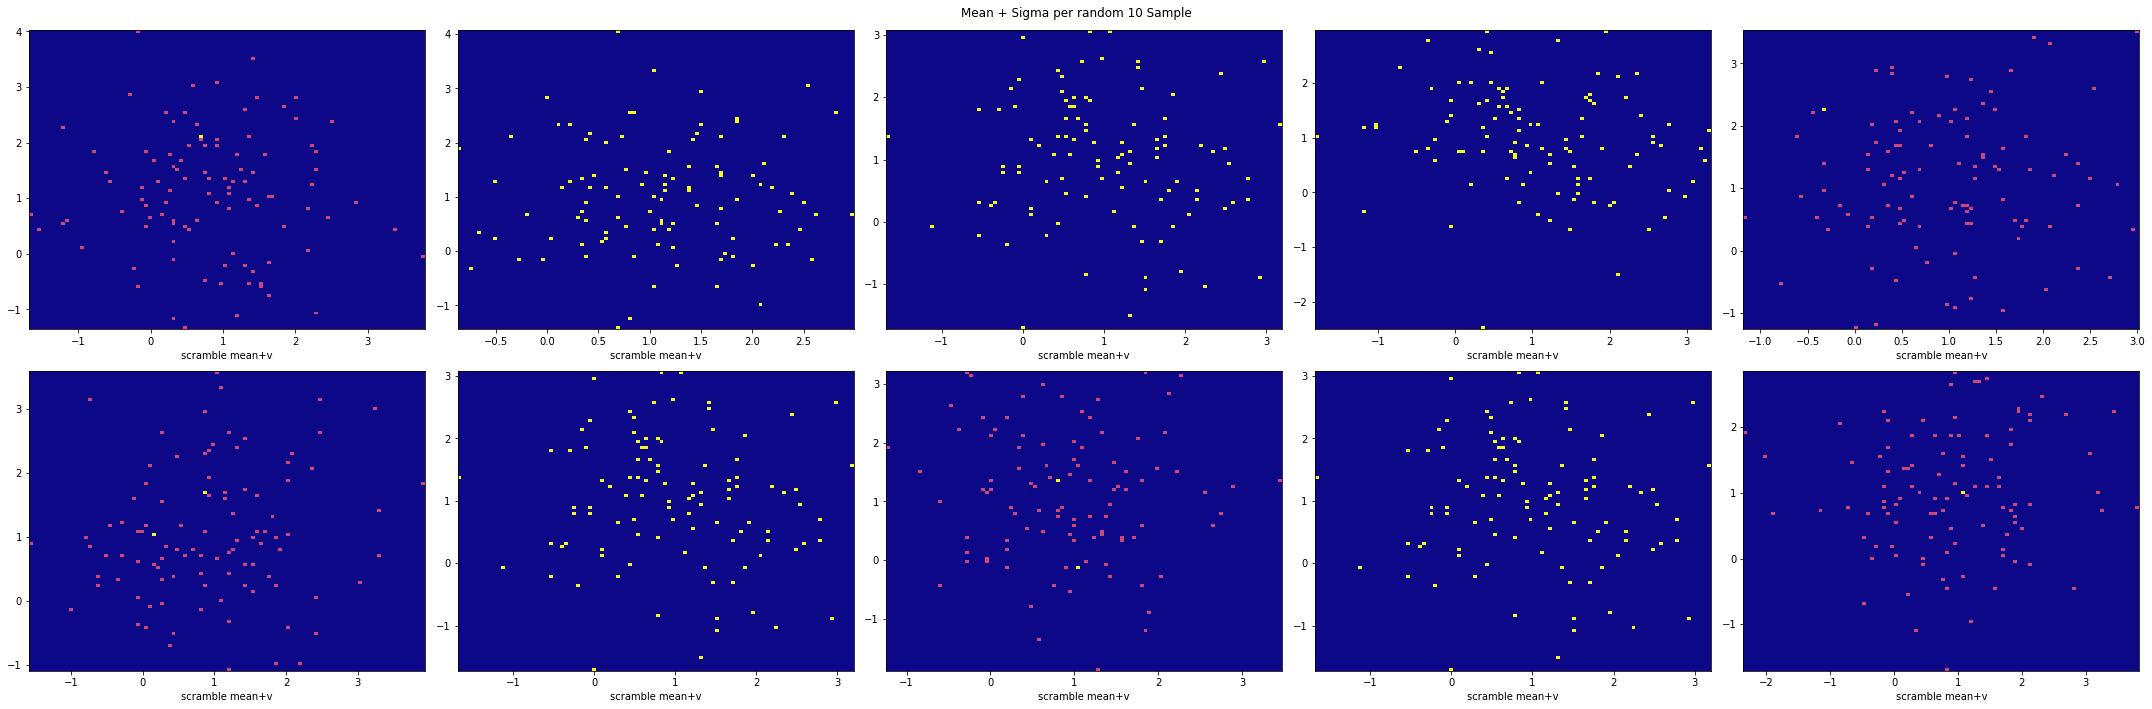

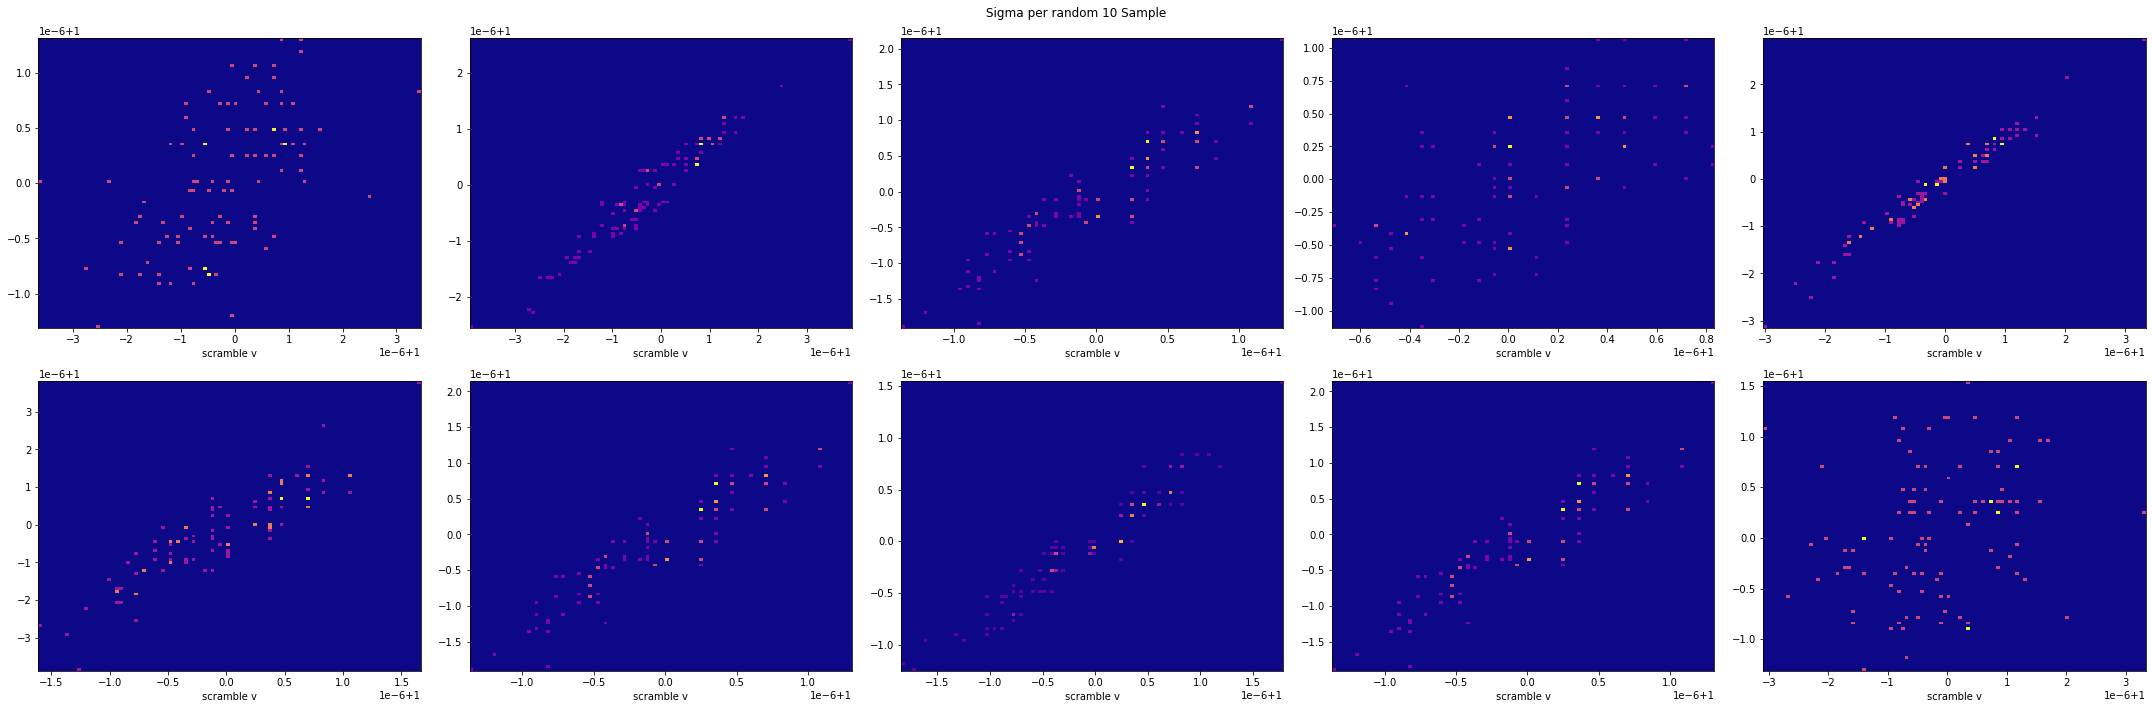

In [85]:
figm,axes=plt.subplots(2,5,figsize=(30,10))
figf,axesf=plt.subplots(2,5,figsize=(30,10))
figv,axesv=plt.subplots(2,5,figsize=(30,10))
figm.suptitle('Mean per random 10 Sample')
figv.suptitle('Sigma per random 10 Sample')
figf.suptitle('Mean + Sigma per random 10 Sample')
axesv = axesv.flatten()
axesf = axesf.flatten()
for i,ax in enumerate(axes.flat):
    x=range(0,featureDim)
    ax.hist2d(fmu[idx[i]],smu[idx[i]], bins=100,density=True,cmap="plasma")
    ax.set_xlabel('face mean')
    ax.set_ylabel('scramble mean ')
    sstdv = np.exp(0.5*sv[idx[i]])
    fstdv = np.exp(0.5*fv[idx[i]])
    ff=fmu[idx[i]]+fstdv
    sf=smu[idx[i]]+sstdv
    axesf[i].hist2d(ff,sf, bins=100,density=True,cmap="plasma")
    axesf[i].set_xlabel('face mean+v')
    axesf[i].set_xlabel('scramble mean+v')
    axesv[i].hist2d(fstdv,sstdv, bins=100,density=True,cmap="plasma")
    axesv[i].set_xlabel('face v')
    axesv[i].set_xlabel('scramble v')
    
    #ax.scatter(range(0,2048),smu[idx[i]])
figm.tight_layout()
figv.tight_layout()
figf.tight_layout()
#for i in range(3,4): 
#    ax[1].scatter(range(0,2048),smu[i])

In [266]:
print(fmu.shape)
print(smu.shape)

(4700, 102)
(4700, 102)


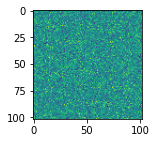

In [291]:
components=102
f=shuffle(fmu)
s=shuffle(smu)
t=int(np.round(fmu.shape[0]*0.7))
fpca = PCA(n_components=components)
fpca.fit(f[:t,:])
spca = PCA(n_components=components)
spca.fit(s[:t,:])

fpcac =  fpca.components_/np.linalg.norm(fpca.components_,axis=1).reshape(components,1)
spcac =  spca.components_/np.linalg.norm(spca.components_,axis=1).reshape(components,1)
d=np.dot(fpcac,spcac.T)
plt.imshow(d,cmap="viridis")

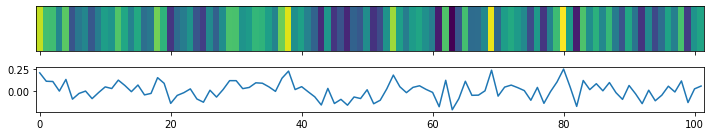

(0, 102)

In [283]:
plt.rcParams["figure.figsize"] = 10,2
fig, (ax,ax2) = plt.subplots(nrows=2, sharex=True)
x = range(0,components)
v=d.diagonal()
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
ax.imshow(v[np.newaxis,:], cmap="viridis", aspect="auto", extent=extent)
ax.set_yticks([])
ax.set_xlim(extent[0], extent[1])
ax2.plot(x,v)
plt.tight_layout()
plt.show()
f[t:,:].shape

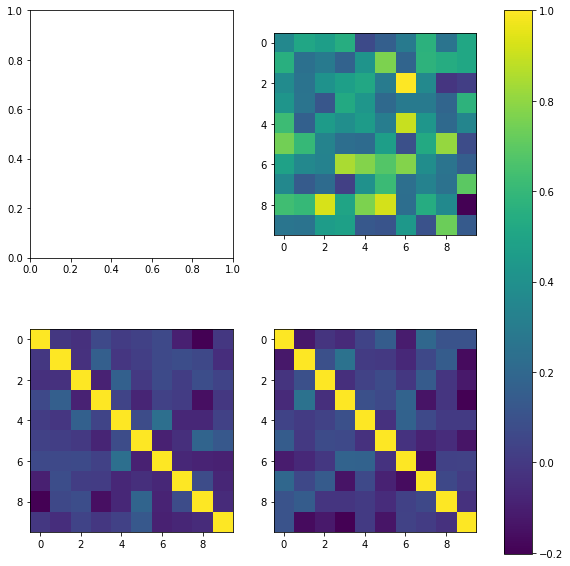

In [320]:
fTestTransform = fpca.transform(f[t:,:])
sTestTransform = spca.transform(s[t:,:])
#idx=np.random.choice(4000,50,replace=False)
fnormal = fTestTransform/np.linalg.norm(fTestTransform,axis=1).reshape(-1,1)
snormal = sTestTransform/np.linalg.norm(sTestTransform,axis=1).reshape(-1,1)
fig,axes=plt.subplots(2,2,figsize=(10,10))
dd=np.dot(fnormal[0:10,:],snormal[0:10,:].T)
axes[0,1].imshow(dd,cmap="viridis")
dd=np.dot(fnormal[0:10,:],fnormal[0:10,:].T)
im=axes[1,0].imshow(dd,cmap="viridis")
dd=np.dot(snormal[0:10,:],snormal[0:10,:].T)
im=axes[1,1].imshow(dd,cmap="viridis")
#cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, ax=axes.ravel().tolist())

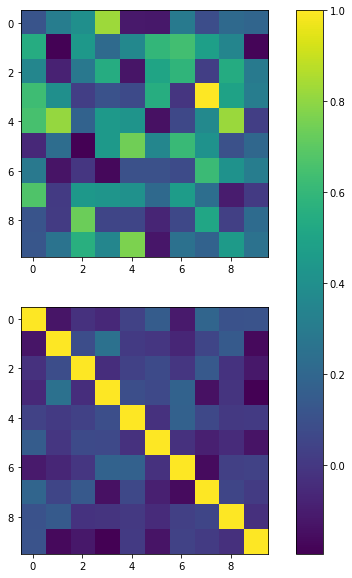

In [319]:
fTestTransform = fpca.transform(s[t:,:])
sTestTransform = spca.transform(s[t:,:])
#idx=np.random.choice(4000,50,replace=False)
fnormal = fTestTransform/np.linalg.norm(fTestTransform,axis=1).reshape(-1,1)
snormal = sTestTransform/np.linalg.norm(sTestTransform,axis=1).reshape(-1,1)
fig,axes=plt.subplots(2,1,figsize=(10,10))
dd=np.dot(fnormal[0:10,:],snormal[0:10,:].T)
axes[0].imshow(dd,cmap="viridis")
dd=np.dot(fnormal[0:10,:],fnormal[0:10,:].T)
im=axes[1].imshow(dd,cmap="viridis")
#cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, ax=axes.ravel().tolist())

In [275]:
f=shuffle(trainFeature)
t=int(np.round(f.shape[0]*0.7))
trainFeature.shape
#train = f[:t,:] 

(9400, 103)

In [272]:
components=102
fpca = PCA(n_components=components)
fpca.fit(train)
spca = PCA(n_components=components)
spca.fit(smu)

PCA(n_components=102)

In [273]:
test = f[t:,:]
testpca = fpca.transform(test)


In [274]:
testpca

array([[ 1.72590325, -0.97767654,  1.22361405, ...,  0.55622499,
         0.61998207, -0.23902106],
       [ 1.20915397,  0.07135346, -0.5268602 , ..., -0.79122804,
        -2.23381301,  0.92614554],
       [ 0.13475484,  0.67093738,  0.60141627, ..., -0.96320432,
         0.14798464,  1.61646709],
       ...,
       [ 0.04513048, -0.33930848, -0.32820058, ..., -0.00877949,
        -0.87637218,  0.43510319],
       [ 0.68259731,  0.49655212, -0.6711647 , ..., -0.13992414,
        -1.20970762, -0.69486116],
       [ 0.91726367,  0.64829036, -1.76952363, ...,  0.23269312,
         2.17089862, -1.89042355]])

In [ ]:
\